In [1]:
import seaborn as sns
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt

In [2]:
from sqlalchemy import create_engine

In [3]:
# Note:: The make sure you use the information from your specific PostgreSQL installation
host = r'127.0.0.1' # denotes that the db in a local installation
db = r'MSDS610' # db we just created
user = r'postgres' # using the postgres user for this demo
pw = r'apurba07' # this is the password established during installation
port = r'5432' # default port estabalished during install

In [4]:
db_conn = create_engine("postgresql://{}:{}@{}:{}/{}".format(user, pw, host, port, db))

In [10]:
table_name = r'mobile'
schema = r'raw' # schema were the data was loaded last week.

df = pd.read_sql_table(table_name, db_conn, schema)

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1030 entries, 0 to 1029
Data columns (total 10 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   User_ID                       974 non-null    float64
 1   Age                           977 non-null    float64
 2   Gender                        978 non-null    object 
 3   Total_App_Usage_Hours         977 non-null    float64
 4   Daily_Screen_Time_Hours       986 non-null    float64
 5   Number_of_Apps_Used           970 non-null    float64
 6   Social_Media_Usage_Hours      996 non-null    float64
 7   Productivity_App_Usage_Hours  982 non-null    float64
 8   Gaming_App_Usage_Hours        980 non-null    float64
 9   Location                      981 non-null    object 
dtypes: float64(8), object(2)
memory usage: 80.6+ KB


In [12]:
# Handle missing values
df = df.dropna() 

In [15]:
# Standardize categorical column formatting (assuming a categorical column exists)
cat_cols = df.select_dtypes(include=['object']).columns
for col in cat_cols:
    df[col] = df[col].str.lower().str.strip()

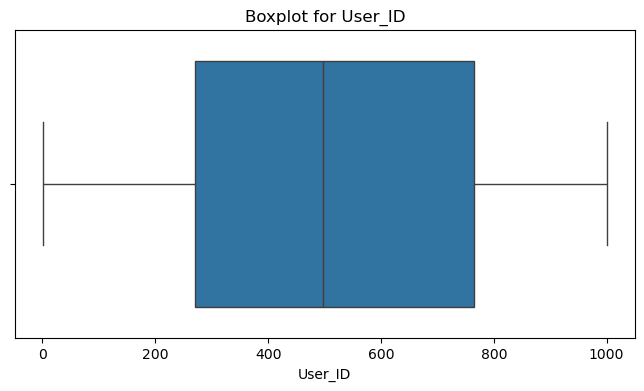

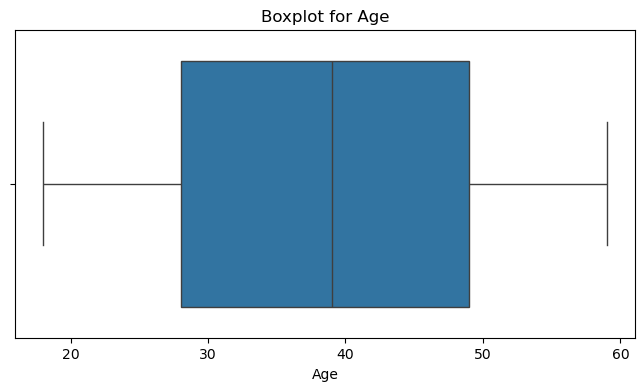

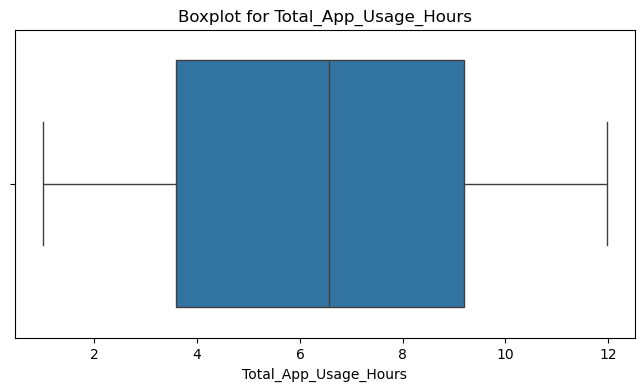

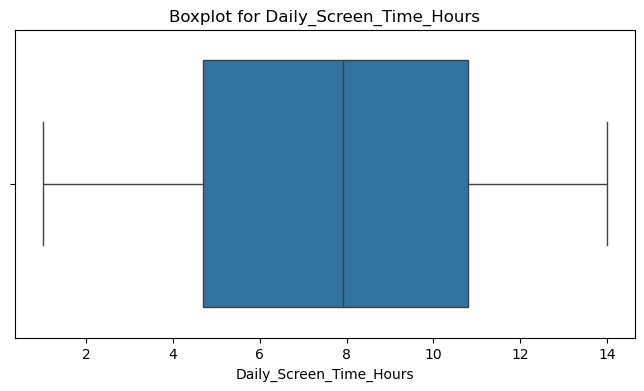

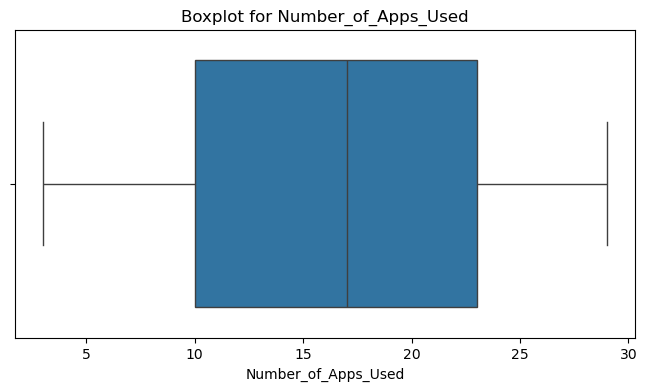

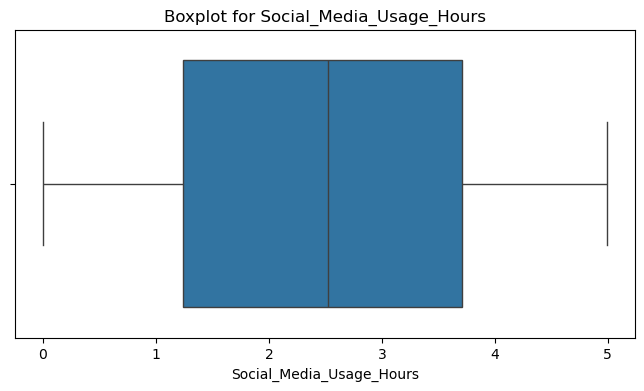

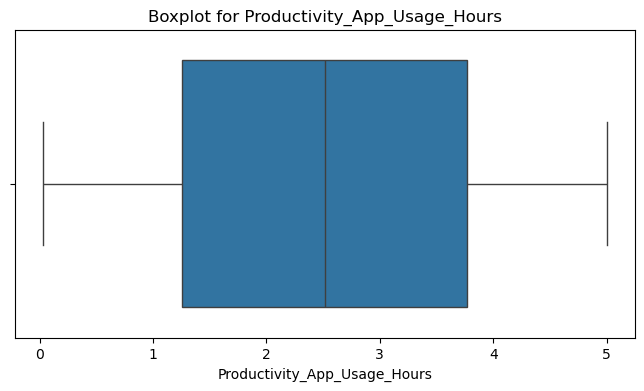

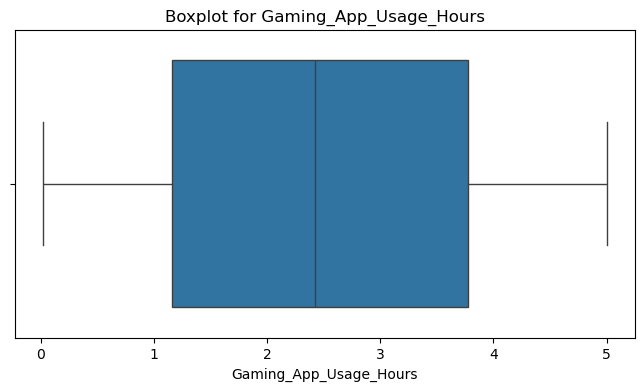

In [16]:
# Detect and visualize outliers using boxplots
num_cols = df.select_dtypes(include=['number']).columns
for col in num_cols:
    plt.figure(figsize=(8,4))
    sns.boxplot(x=df[col])
    plt.title(f'Boxplot for {col}')
    plt.show()

In [17]:
# Detect and remove outliers using IQR method
for col in num_cols:
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    df = df[(df[col] >= lower_bound) & (df[col] <= upper_bound)]

# Save the cleaned dataset
df.to_csv('mobile_cleaned.csv', index=False)

# Display cleaned data info
display(df.info())
display(df.head())

<class 'pandas.core.frame.DataFrame'>
Index: 620 entries, 0 to 1029
Data columns (total 10 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   User_ID                       620 non-null    float64
 1   Age                           620 non-null    float64
 2   Gender                        620 non-null    object 
 3   Total_App_Usage_Hours         620 non-null    float64
 4   Daily_Screen_Time_Hours       620 non-null    float64
 5   Number_of_Apps_Used           620 non-null    float64
 6   Social_Media_Usage_Hours      620 non-null    float64
 7   Productivity_App_Usage_Hours  620 non-null    float64
 8   Gaming_App_Usage_Hours        620 non-null    float64
 9   Location                      620 non-null    object 
dtypes: float64(8), object(2)
memory usage: 53.3+ KB


None

,User_ID,Age,Gender,Total_App_Usage_Hours,Daily_Screen_Time_Hours,Number_of_Apps_Used,Social_Media_Usage_Hours,Productivity_App_Usage_Hours,Gaming_App_Usage_Hours,Location
0,1.0,56.0,male,2.61,7.15,24.0,4.43,0.55,2.40,los angeles
1,2.0,46.0,male,2.13,13.79,18.0,4.67,4.42,2.43,chicago
2,3.0,32.0,female,7.28,4.50,11.0,4.58,1.71,2.83,houston
7,8.0,40.0,male,9.53,8.85,11.0,2.66,0.28,2.93,chicago
9,10.0,28.0,male,1.80,4.11,16.0,2.14,1.20,0.96,new york


In [18]:
table_name = r'mobile_cleaned'
schema = r'cleaned' # schema we created this week.

df.to_sql(table_name, con=db_conn, if_exists='replace', index=False, schema=schema, chunksize=1000, method='multi')

620